###아주 큰 농어


In [6]:
import matplotlib.pyplot as plt
import numpy as np


perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

print(perch_length.shape)
print(perch_weight.shape)

(56,)
(56,)


In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)  ## sklearn 을 이용해서 모델을 돌리기 위해서는 2차원의 배열에 맞춰야 되기 때문에 데이터 형식을 조정한다.
test_input = test_input.reshape(-1, 1)


In [8]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

knr.score(test_input, test_target)  ## k - 최근접 이웃 알고리즘의 score 함수는 R스퀘어 값을 의미한다.

0.992809406101064

In [9]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)  ## K- 최근접 이웃 알고리즘의 mean_absolute_error 함수는 말그대로 mae를 의미한다.
print(mae)

19.157142857142862


In [10]:
knr.n_neighbors = 3  ## default 값은 =5

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target) )


0.9804899950518966


In [11]:
print(knr.predict([[50]]))

[1033.33333333]


### 50cm 농어의 이웃

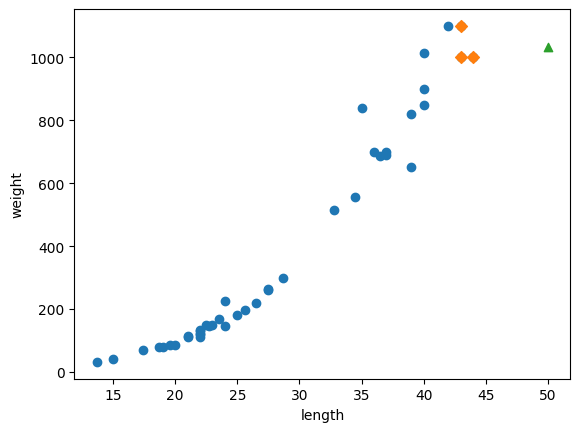

In [12]:
# 50cm 농어의 이웃을 구합니다.
distances , Indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[Indexes], train_target[Indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

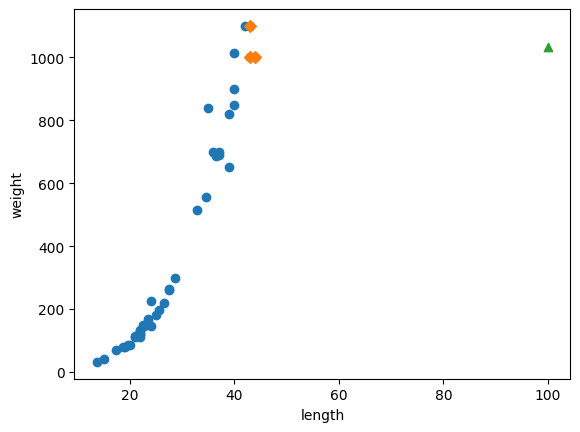

In [13]:
# 100cm 농어의 이웃을 구합니다.
distances , Indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[Indexes], train_target[Indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 선형회귀(linear regression)
  - 관련있는 것들 : logistic regression (로지스틱회귀), 신경망 알고리즘(Nueral Network)

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [15]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


y = 39.017x -709.018

### 학습한 직선 그리기


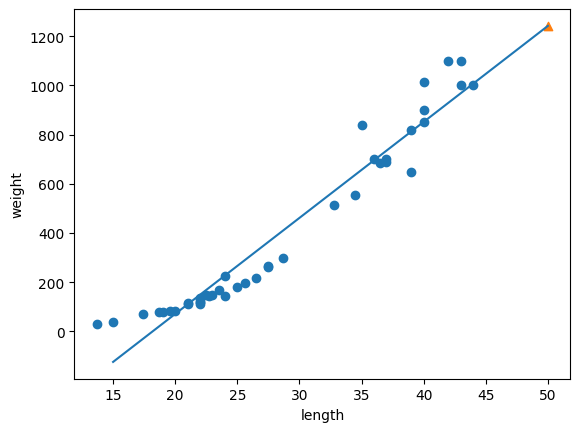

In [16]:
# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
print(lr.score(train_input, train_target))


0.939846333997604


In [18]:
print(lr.score(test_input, test_target))

0.8247503123313558


### 다항 회귀 (Ploynomial Regression) != 다변량 회귀(Multi-variable Regression)



In [19]:
train_poly = np.column_stack((train_input**2, train_input))  ## 열을 여러개로 쌓는 함수
test_poly = np.column_stack((test_input**2, test_input))

### 모델 다시 훈련

In [20]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]])) ## 현재 다항회귀식(x^2 + x)을 만들었기 때문에 예측 변수 50을 그냥 넣어주면 안되고 변형 시킨 식에 맞도록 [[50^2 , 50]] 투입해야 한다

[1573.98423528]


In [21]:
print(lr.coef_ , lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


y = 1.014x^2 -21.557x +116.05

### 학습한 직선 그리기

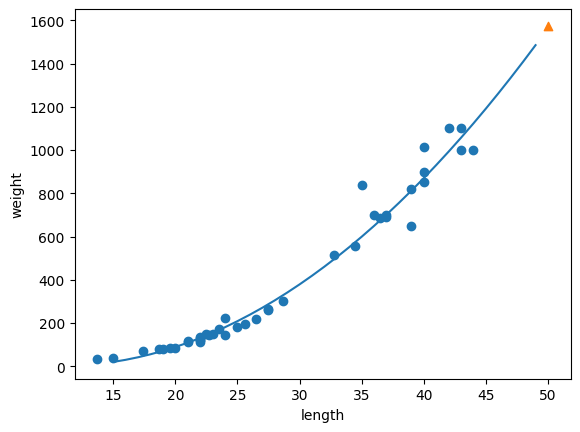

In [22]:
## 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다.
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다.
plt.plot(point, 1.01*point**2 - 21.55*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
print(lr.score(train_poly, train_target))

0.9706807451768623


In [24]:
print(lr.score(test_poly, test_target))

0.9775935108325122
